In [1]:
#Add coomand
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("../Datasets/Mall_Customers.csv",index_col="CustomerID")

In [35]:
df

,Genre,Age,Annual_Income_(k$),Spending_Score,Customer Group
CustomerID,,,,,
1,1,19,15,39,2
2,1,21,15,81,4
3,0,20,16,6,2
4,0,23,16,77,4
5,0,31,17,40,2
...,...,...,...,...,...
196,0,35,120,79,3
197,0,45,126,28,1
198,1,32,126,74,3


In [4]:
df.isna().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [5]:
le=LabelEncoder()
df["Genre"]=le.fit_transform(df["Genre"])

In [10]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [11]:
X=df

### Elbow Method

##### Inertia: It is the sum of squared distances of samples to their closest cluster center.
We iterate the values of k from 1 to 10 using for loop and calculated the values of inertia for each value of k.

In [12]:
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(X)
    ssd.append(model.inertia_ )
help(KMeans)
# print(ssd)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

Text(0, 0.5, 'Inertia(Sum of Squared Distances)')

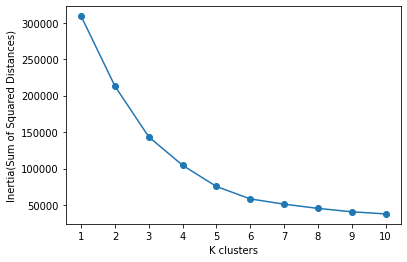

In [13]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia(Sum of Squared Distances)")

To get the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5.

In [34]:
model=KMeans(n_clusters=5)
model.fit(X)
9*22

198

In [15]:
model.labels_

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [16]:
model.cluster_centers_

array([[ 0.41772152, 43.12658228, 54.82278481, 49.83544304],
       [ 0.51351351, 40.32432432, 87.43243243, 18.18918919],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636]])

In [17]:
model.n_iter_

4

In [18]:
data=df
data["Customer Group"]=model.labels_

In [19]:
data

,Genre,Age,Annual_Income_(k$),Spending_Score,Customer Group
CustomerID,,,,,
1,1,19,15,39,2
2,1,21,15,81,4
3,0,20,16,6,2
4,0,23,16,77,4
5,0,31,17,40,2
...,...,...,...,...,...
196,0,35,120,79,3
197,0,45,126,28,1
198,1,32,126,74,3


In [20]:
df.columns

Index(['Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score',
       'Customer Group'],
      dtype='object')

### Selecting only two features for model for visualization of Clusters
Annual_Income_(k$) and Spending_Score are two important Features

In [21]:
X=df[[ 'Annual_Income_(k$)', 'Spending_Score',]]

In [22]:
X

,Annual_Income_(k$),Spending_Score
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


### Elbow method to get optimal number of k on new data

In [23]:
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(X)
    ssd.append(model.inertia_ )

Text(0, 0.5, 'Inertia(Sum of Squared Distances)')

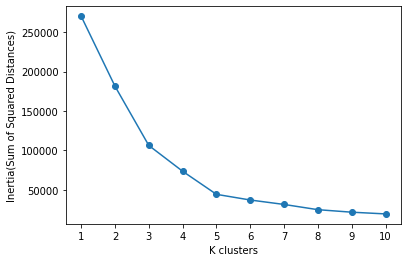

In [24]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia(Sum of Squared Distances)")

To get the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5.

In [25]:
model=KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [38]:
group_labels=model.labels_
centeroid=model.cluster_centers_
centeroid.shape[0] ### 5 rows

5

### Cluster Visualization

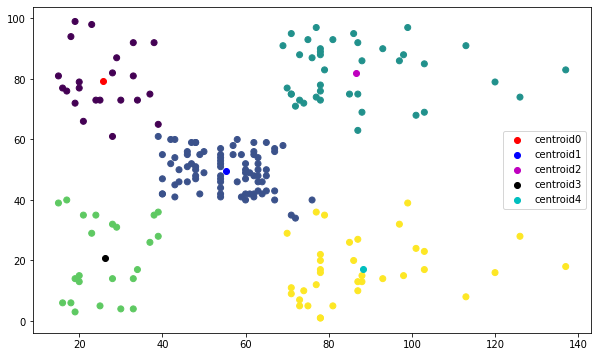

In [27]:
#plotting the clusters
fig=plt.figure(figsize=(10,6))
plt.scatter(df['Annual_Income_(k$)'],df['Spending_Score'],c=group_labels)
color=["r","b","m","k","c","y"]
for i in range(centeroid.shape[0]):
    plt.scatter(centeroid[i][0],centeroid[i][1],color=color[i], label=str("centroid"+str(i)))
plt.legend()

In [33]:
import math

k1 = [1,19,15,39]
k2 = [21,15,81,4]
ED1 = math.sqrt((0-1)**2+(20-19)**2+(16-15)**2+(6-39)**2)
print(ED1)
ED2 = math.sqrt((0-1)**2+(20-21)**2+(16-15)**2+(6-81)**2)
print(ED2)
if ED1 >= ED2:
    

33.04542328371661
75.0199973340442


In [28]:
df

,Genre,Age,Annual_Income_(k$),Spending_Score,Customer Group
CustomerID,,,,,
1,1,19,15,39,2
2,1,21,15,81,4
3,0,20,16,6,2
4,0,23,16,77,4
5,0,31,17,40,2
...,...,...,...,...,...
196,0,35,120,79,3
197,0,45,126,28,1
198,1,32,126,74,3
